In this exercise, we want to use recursion to create a flood-fill function for images. Our flood-fill function is supposed to fill a connected region of black pixels with a different color, for example, if we do flood-fill with red color on the center of this image:

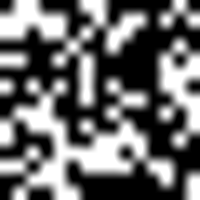

the region containing the center pixel becomes red:

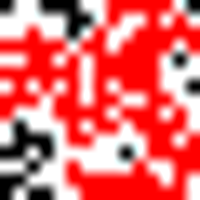

We first start with a function generating black-white noise images that we can use to test our function on later. Run the code below.

In [ ]:
from simpleimage import SimpleImage
import random

def get_random_image(size, threshold):
    image = SimpleImage.blank(size, size)
    for y in range(size):
        for x in range(size):
            if random.random() > threshold:
                image.set_rgb(x, y, 0, 0, 0)
    return image

image = get_random_image(50, 0.7)
image.show(resize_width=200)

Now fill in the `floodfill` function below. It takes an image `img` to do the flood-fill on, a starting position `x` and `y`, and the `r`, `g` and `b` components of the color to fill in. Whenever we find a black pixel, we fill it with the new color and then do the same flood-fill procedure for the neighbors of our pixel, to expand the region we are filling in. Proceed as follows:

Check if $(x, y)$ is within the boundary of the image, and if the pixel at $(x, y)$ is black. If yes:
- change the color of the pixel at $(x, y)$
- recursively call `floodfill` for the pixels at $(x-1, y)$, $(x+1, y)$, $(x, y-1)$ and $(x, y+1)$.

In [ ]:
def floodfill(img, x, y, r, g, b):
    if x < 0 or y < 0 or x >= img.width or y >= img.height:
        return
    if img.get_rgb(x, y) != [0, 0, 0]:
        return
    img.set_rgb(x, y, r, g, b)
    floodfill(img, x-1, y, r, g, b)
    floodfill(img, x+1, y, r, g, b)
    floodfill(img, x, y-1, r, g, b)
    floodfill(img, x, y+1, r, g, b)
      
image = get_random_image(15, 0.45)
image.set_rgb(7, 7, 0, 0, 0)
image.show(resize_width=200)
floodfill(image, 7, 7, 255, 0, 0)
image.show(resize_width=200)